In [ ]:
 # Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing pandas for working with Table
import pandas as pd

In [ ]:
# Library for data visulisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Creating datafream
csv_path="/content/drive/MyDrive/Kaggle-api/insurance.csv"
df=pd.read_csv(csv_path)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Chacking for nan values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Exploring region column
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# Exploring sex column
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
# Exploring sex column
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


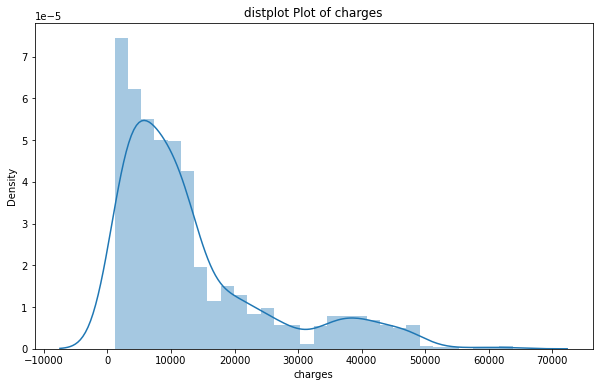

In [ ]:
# Exploring charges column
plt.figure(figsize=(10,6))
plt.title("distplot Plot of charges")
sns.distplot(df.charges);

The Cherges is Right Skewed. Log Transformetion Can fixit

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


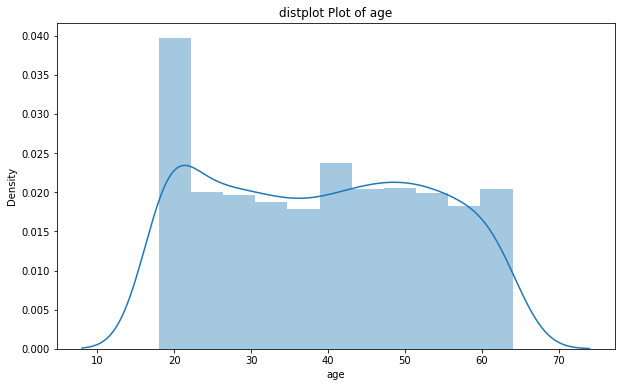

In [ ]:
# Exploring age column
plt.figure(figsize=(10,6))
plt.title("distplot Plot of age")
sns.distplot(df.age);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


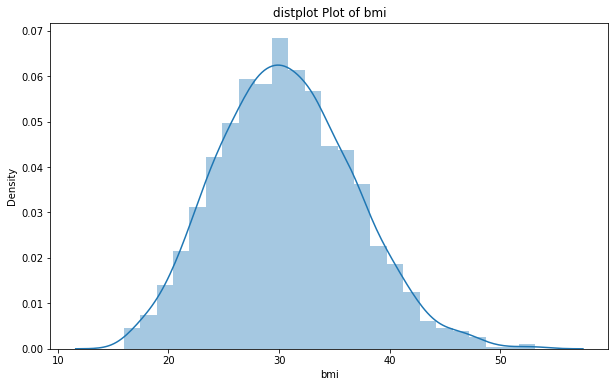

In [ ]:
# Exploring bmi column
plt.figure(figsize=(10,6))
plt.title("distplot Plot of bmi")
sns.distplot(df.bmi);

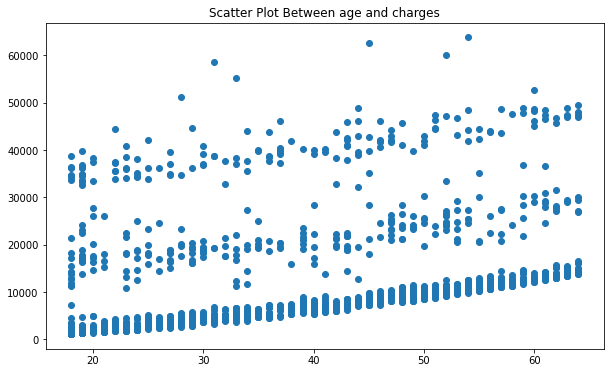

In [ ]:
# Exploring relation between age and charges columns
plt.figure(figsize=(10,6))
plt.title("Scatter Plot Between age and charges")
plt.scatter(df.age,df.charges);

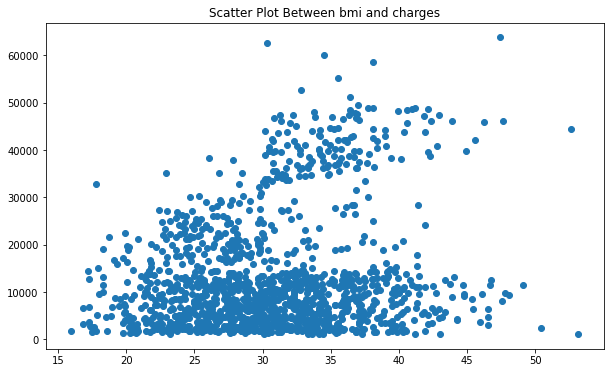

In [ ]:
# Exploring relation between bmi and charges columns
plt.figure(figsize=(10,6))
plt.title("Scatter Plot Between bmi and charges")
plt.scatter(df.bmi,df.charges);

In [ ]:
# lable encoding sex and smoker
df.sex=df.sex.map({"female":1,"male":0})
df.smoker=df.smoker.map({"no":1,"yes":0})

In [ ]:
# One hot encoding region
encoded_df=pd.get_dummies(df, columns=["region"],drop_first=True)

In [ ]:
encoded_df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,1
1,18,0,33.770,1,1,1725.55230,0,1,0
2,28,0,33.000,3,1,4449.46200,0,1,0
3,33,0,22.705,0,1,21984.47061,1,0,0
4,32,0,28.880,0,1,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,1,0,0
1334,18,1,31.920,0,1,2205.98080,0,0,0
1335,18,1,36.850,0,1,1629.83350,0,1,0
1336,21,1,25.800,0,1,2007.94500,0,0,1


In [ ]:
# removing outlayer from charges
encoded_df=encoded_df[encoded_df["charges"]<=50000]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


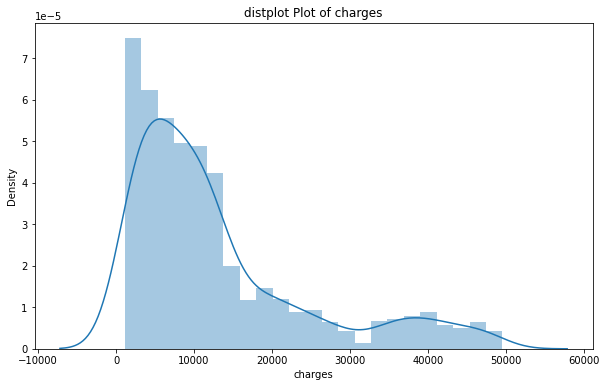

In [ ]:
# Exploring charges column without outlayer
plt.figure(figsize=(10,6))
plt.title("distplot Plot of charges")
sns.distplot(encoded_df.charges);

<ipython-input-22-e96b29be608f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df["log_charges"]=encoded_df["charges"].apply(lambda x: np.log(x))
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


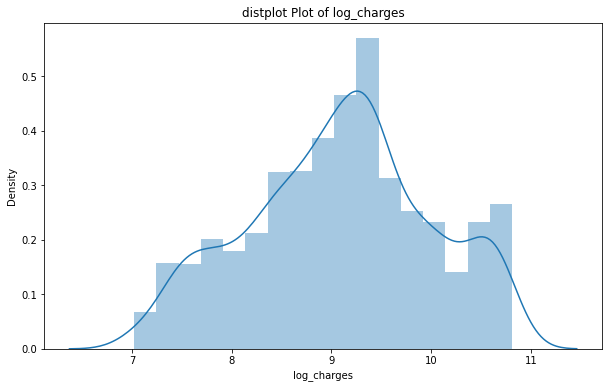

In [ ]:
#Log transformation of charges
import numpy as np
encoded_df["log_charges"]=encoded_df["charges"].apply(lambda x: np.log(x))
plt.figure(figsize=(10,6))
plt.title("distplot Plot of log_charges")
sns.distplot(encoded_df.log_charges);

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
x=encoded_df.drop(["log_charges","charges"],1)
y=encoded_df["log_charges"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<ipython-input-23-81dca444e348>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=encoded_df.drop(["log_charges","charges"],1)


##Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
pred = reg.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the linear regressor is: "+str(s))
print("The MsE with the linear regressor is: "+str(s1))
print("The R2_Score with the linear regressor is: "+str(s2))

The MAE with the linear regressor is: 0.27653593292963485
The MsE with the linear regressor is: 0.2010515616454934
The R2_Score with the linear regressor is: 0.7616171891070921


##Linear Regression with out log transformetion

In [ ]:
x=encoded_df.drop(["log_charges","charges"],1)
y=encoded_df["charges"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<ipython-input-27-56c0c46795e7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=encoded_df.drop(["log_charges","charges"],1)


In [ ]:
pred = reg.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the linear regressor is: "+str(s))
print("The MsE with the linear regressor is: "+str(s1))
print("The R2_Score with the linear regressor is: "+str(s2))

The MAE with the linear regressor is: 14052.531250510836
The MsE with the linear regressor is: 356223181.0225534
The R2_Score with the linear regressor is: -1.2436980730231282
